In [9]:
import loader
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,SGDClassifier


In [2]:
movie_reviews = loader.load_imdb_data()
print(movie_reviews.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the filming tech...  positive
2  i thought this was wonderful way to spend time...  positive
3  basically there a family where little boy jake...  negative
4  petter mattei love in the time of money is vis...  positive


In [3]:
# Show how many positive and negative values exist
print(movie_reviews['sentiment'].value_counts())


negative    25000
positive    25000
Name: sentiment, dtype: int64


In [10]:
def show_word_cloud(texsts):
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=3000,
                          height=2500
                          ).generate(texsts)
    plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

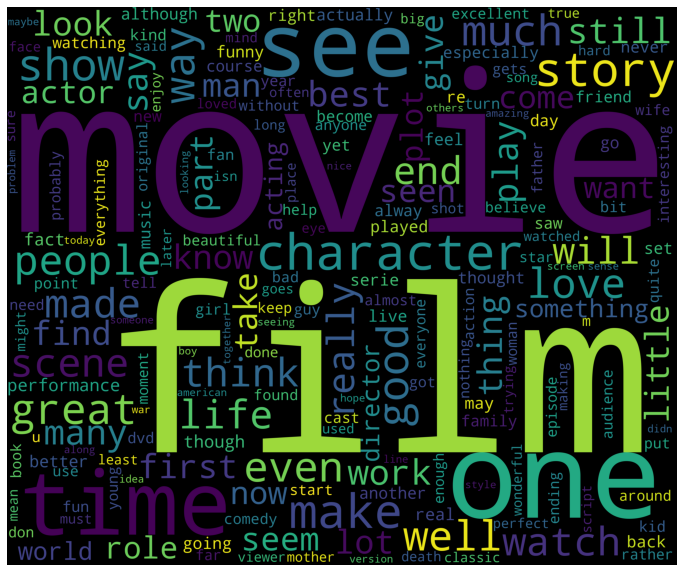

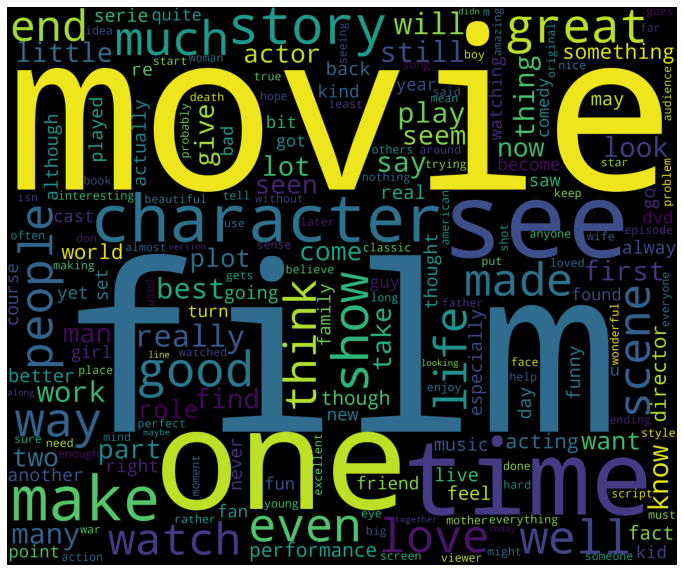

In [12]:
positive_reviews = movie_reviews[movie_reviews['sentiment'] == 'positive']
words = ' '.join(positive_reviews['review'])
show_word_cloud(words)